In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('data/Heart.csv')

In [5]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,HD
0,63,1,3,145,233,1,2,150,0,2.3,3,0,0,No
1,67,1,0,160,286,0,2,108,1,1.5,2,3,1,Yes
2,67,1,0,120,229,0,2,129,1,2.6,2,2,2,Yes
3,37,1,1,130,250,0,0,187,0,3.5,3,0,1,No
4,41,0,2,130,204,0,2,172,0,1.4,1,0,1,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
Age          297 non-null int64
Sex          297 non-null int64
ChestPain    297 non-null int64
RestBP       297 non-null int64
Chol         297 non-null int64
Fbs          297 non-null int64
RestECG      297 non-null int64
MaxHR        297 non-null int64
ExAng        297 non-null int64
Oldpeak      297 non-null float64
Slope        297 non-null int64
Ca           297 non-null int64
Thal         297 non-null int64
HD           297 non-null object
dtypes: float64(1), int64(12), object(1)
memory usage: 32.6+ KB


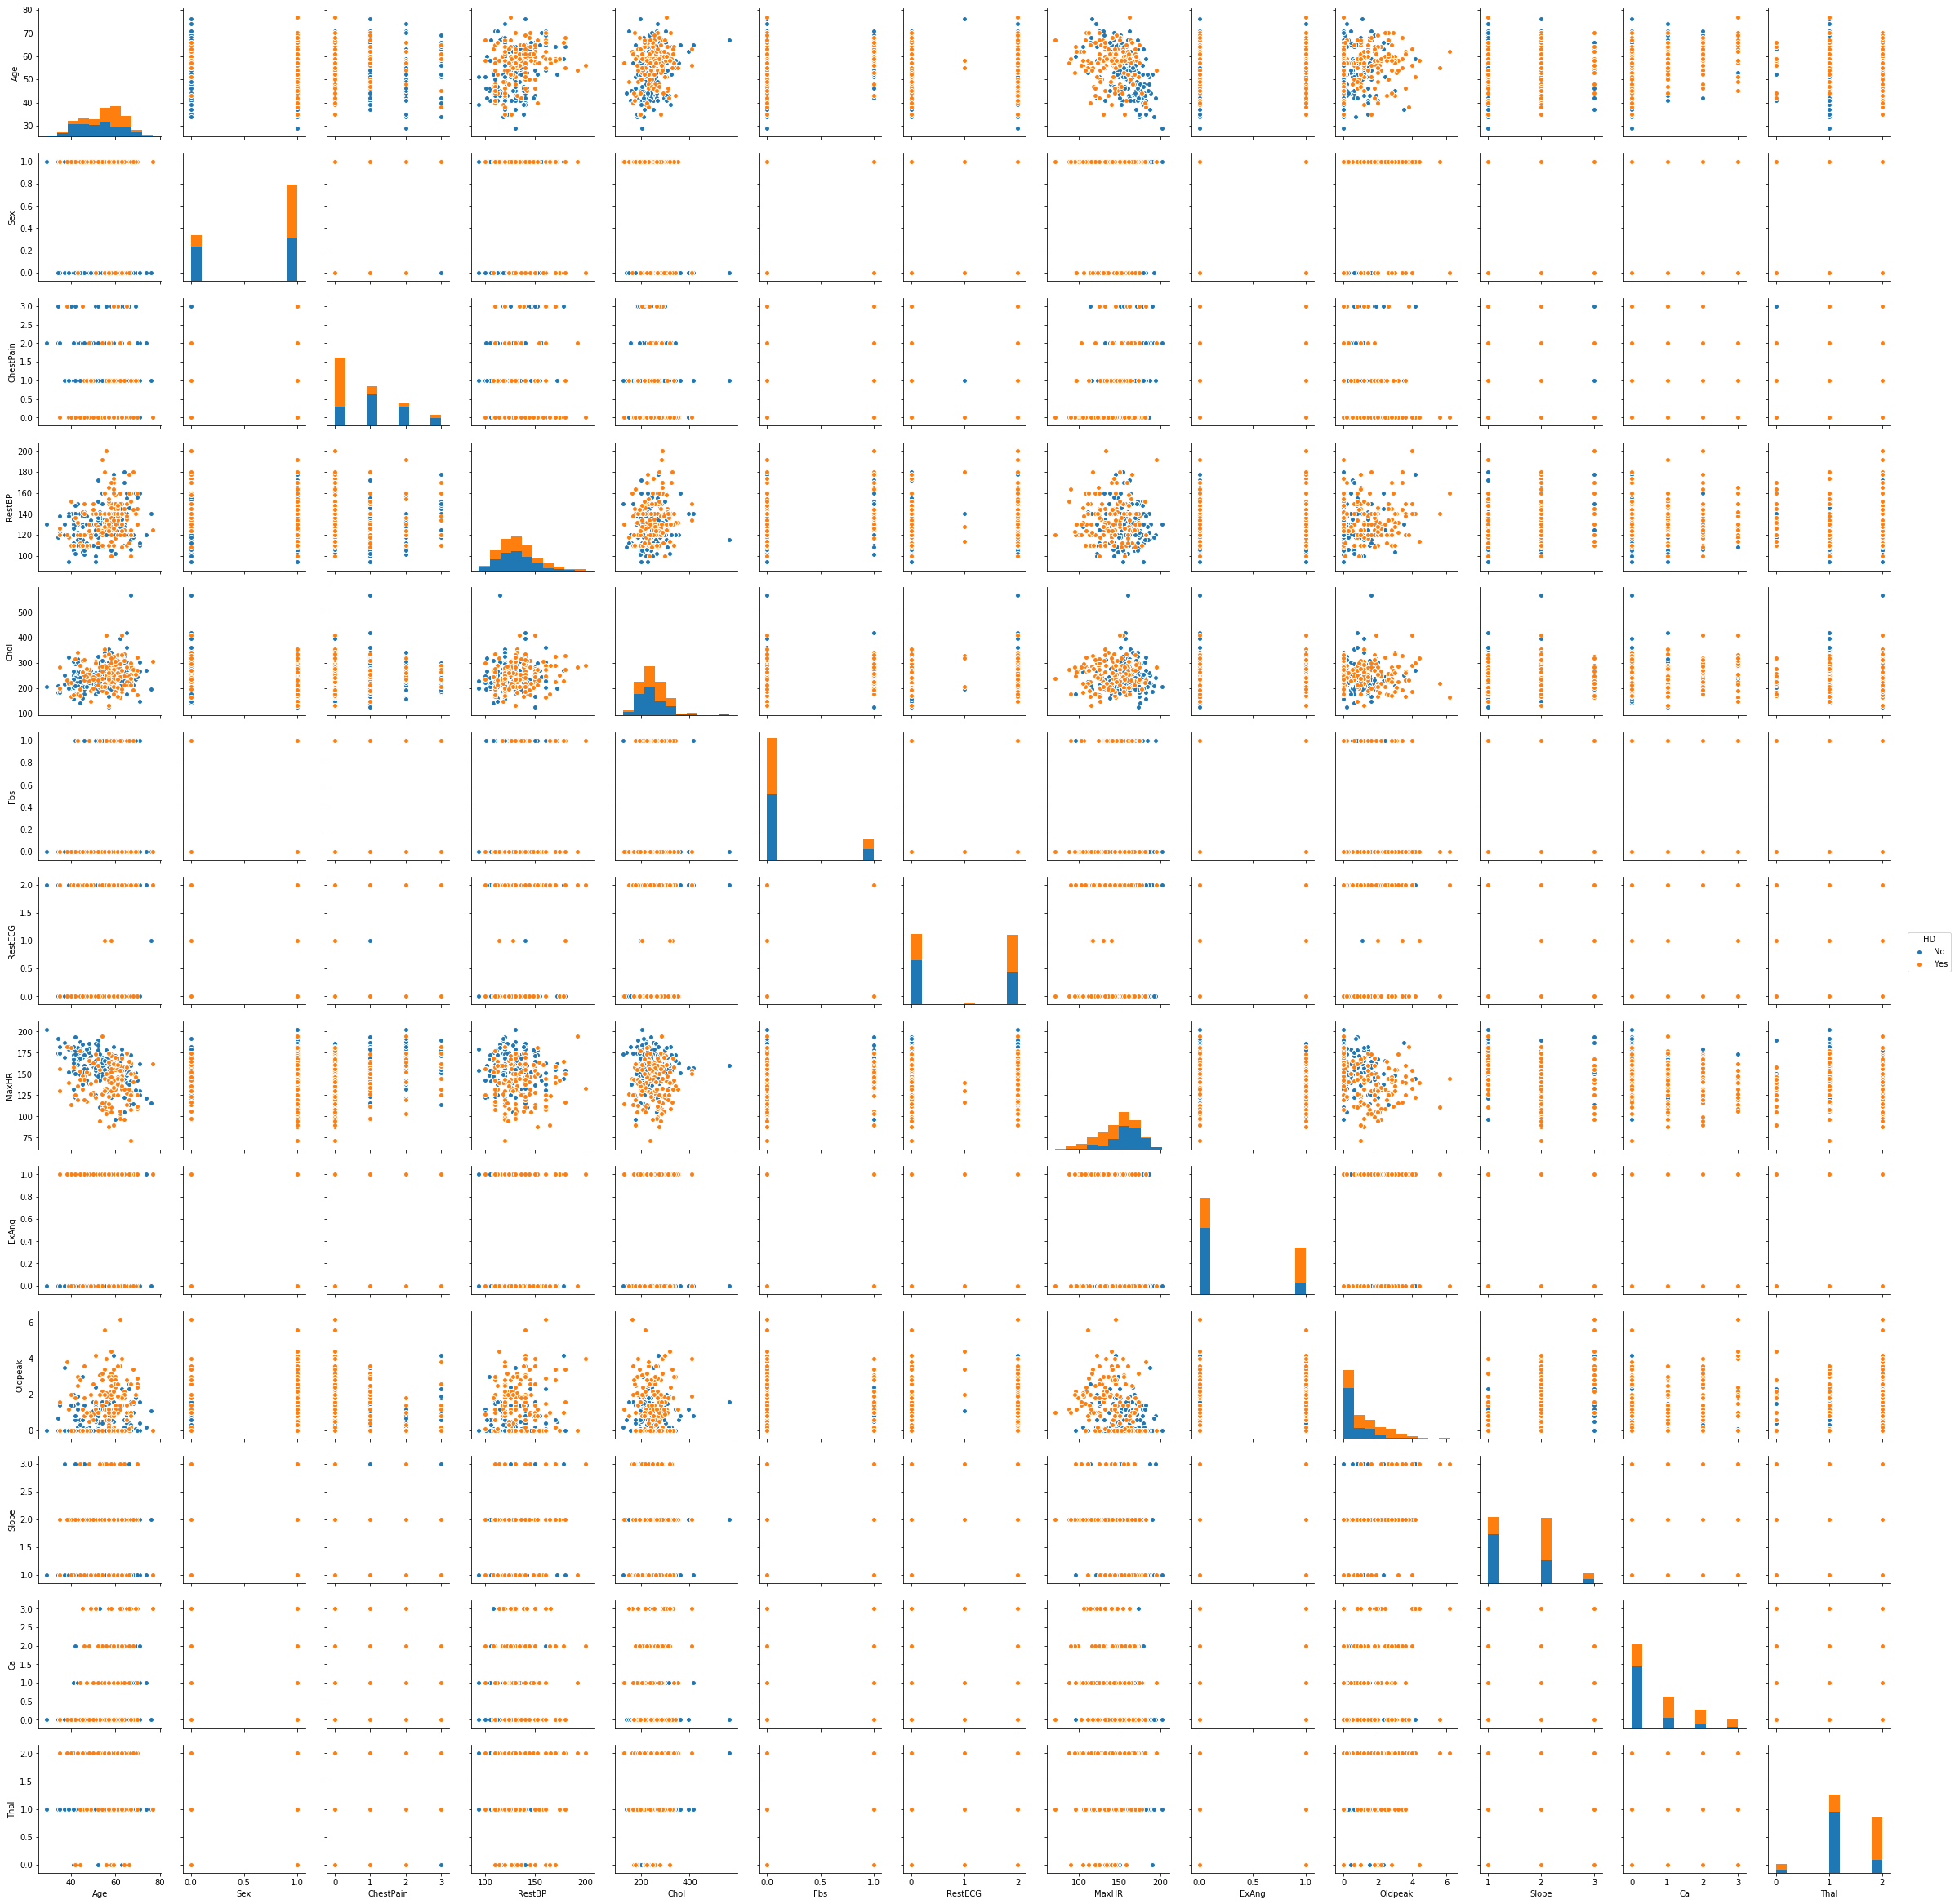

In [7]:
sns.pairplot(df,hue='HD')

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop('HD',axis=1)

In [10]:
y = df['HD']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtree = DecisionTreeClassifier()

In [14]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
predictions = dtree.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[39 14]
 [19 27]]


             precision    recall  f1-score   support

         No       0.67      0.74      0.70        53
        Yes       0.66      0.59      0.62        46

avg / total       0.67      0.67      0.66        99



In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rfc = RandomForestClassifier(n_estimators=100)

In [20]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
rfc_pred = rfc.predict(X_test)

In [22]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[46  7]
 [11 35]]


             precision    recall  f1-score   support

         No       0.81      0.87      0.84        53
        Yes       0.83      0.76      0.80        46

avg / total       0.82      0.82      0.82        99



In [23]:
forest = RandomForestClassifier(n_estimators = 100, oob_score=True)
forest.fit(X, y)
print(forest.oob_score_)

0.8181818181818182


In [24]:
df['HD'].value_counts()

No     160
Yes    137
Name: HD, dtype: int64

In [25]:
df2 = pd.read_csv('data/Heart.csv')

In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df2 = df2.apply(le.fit_transform)

In [27]:
df2.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,HD
0,29,1,3,31,64,1,2,49,0,22,2,0,0,0
1,33,1,0,40,111,0,2,10,1,15,1,3,1,1
2,33,1,0,14,60,0,2,29,1,25,1,2,2,1
3,3,1,1,22,80,0,0,84,0,32,2,0,1,0
4,7,0,2,22,35,0,2,71,0,14,0,0,1,0


In [28]:
set(df2['HD'])

{0, 1}

In [29]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[0:13])
features

['Age',
 'Sex',
 'ChestPain',
 'RestBP',
 'Chol',
 'Fbs',
 'RestECG',
 'MaxHR',
 'ExAng',
 'Oldpeak',
 'Slope',
 'Ca',
 'Thal']

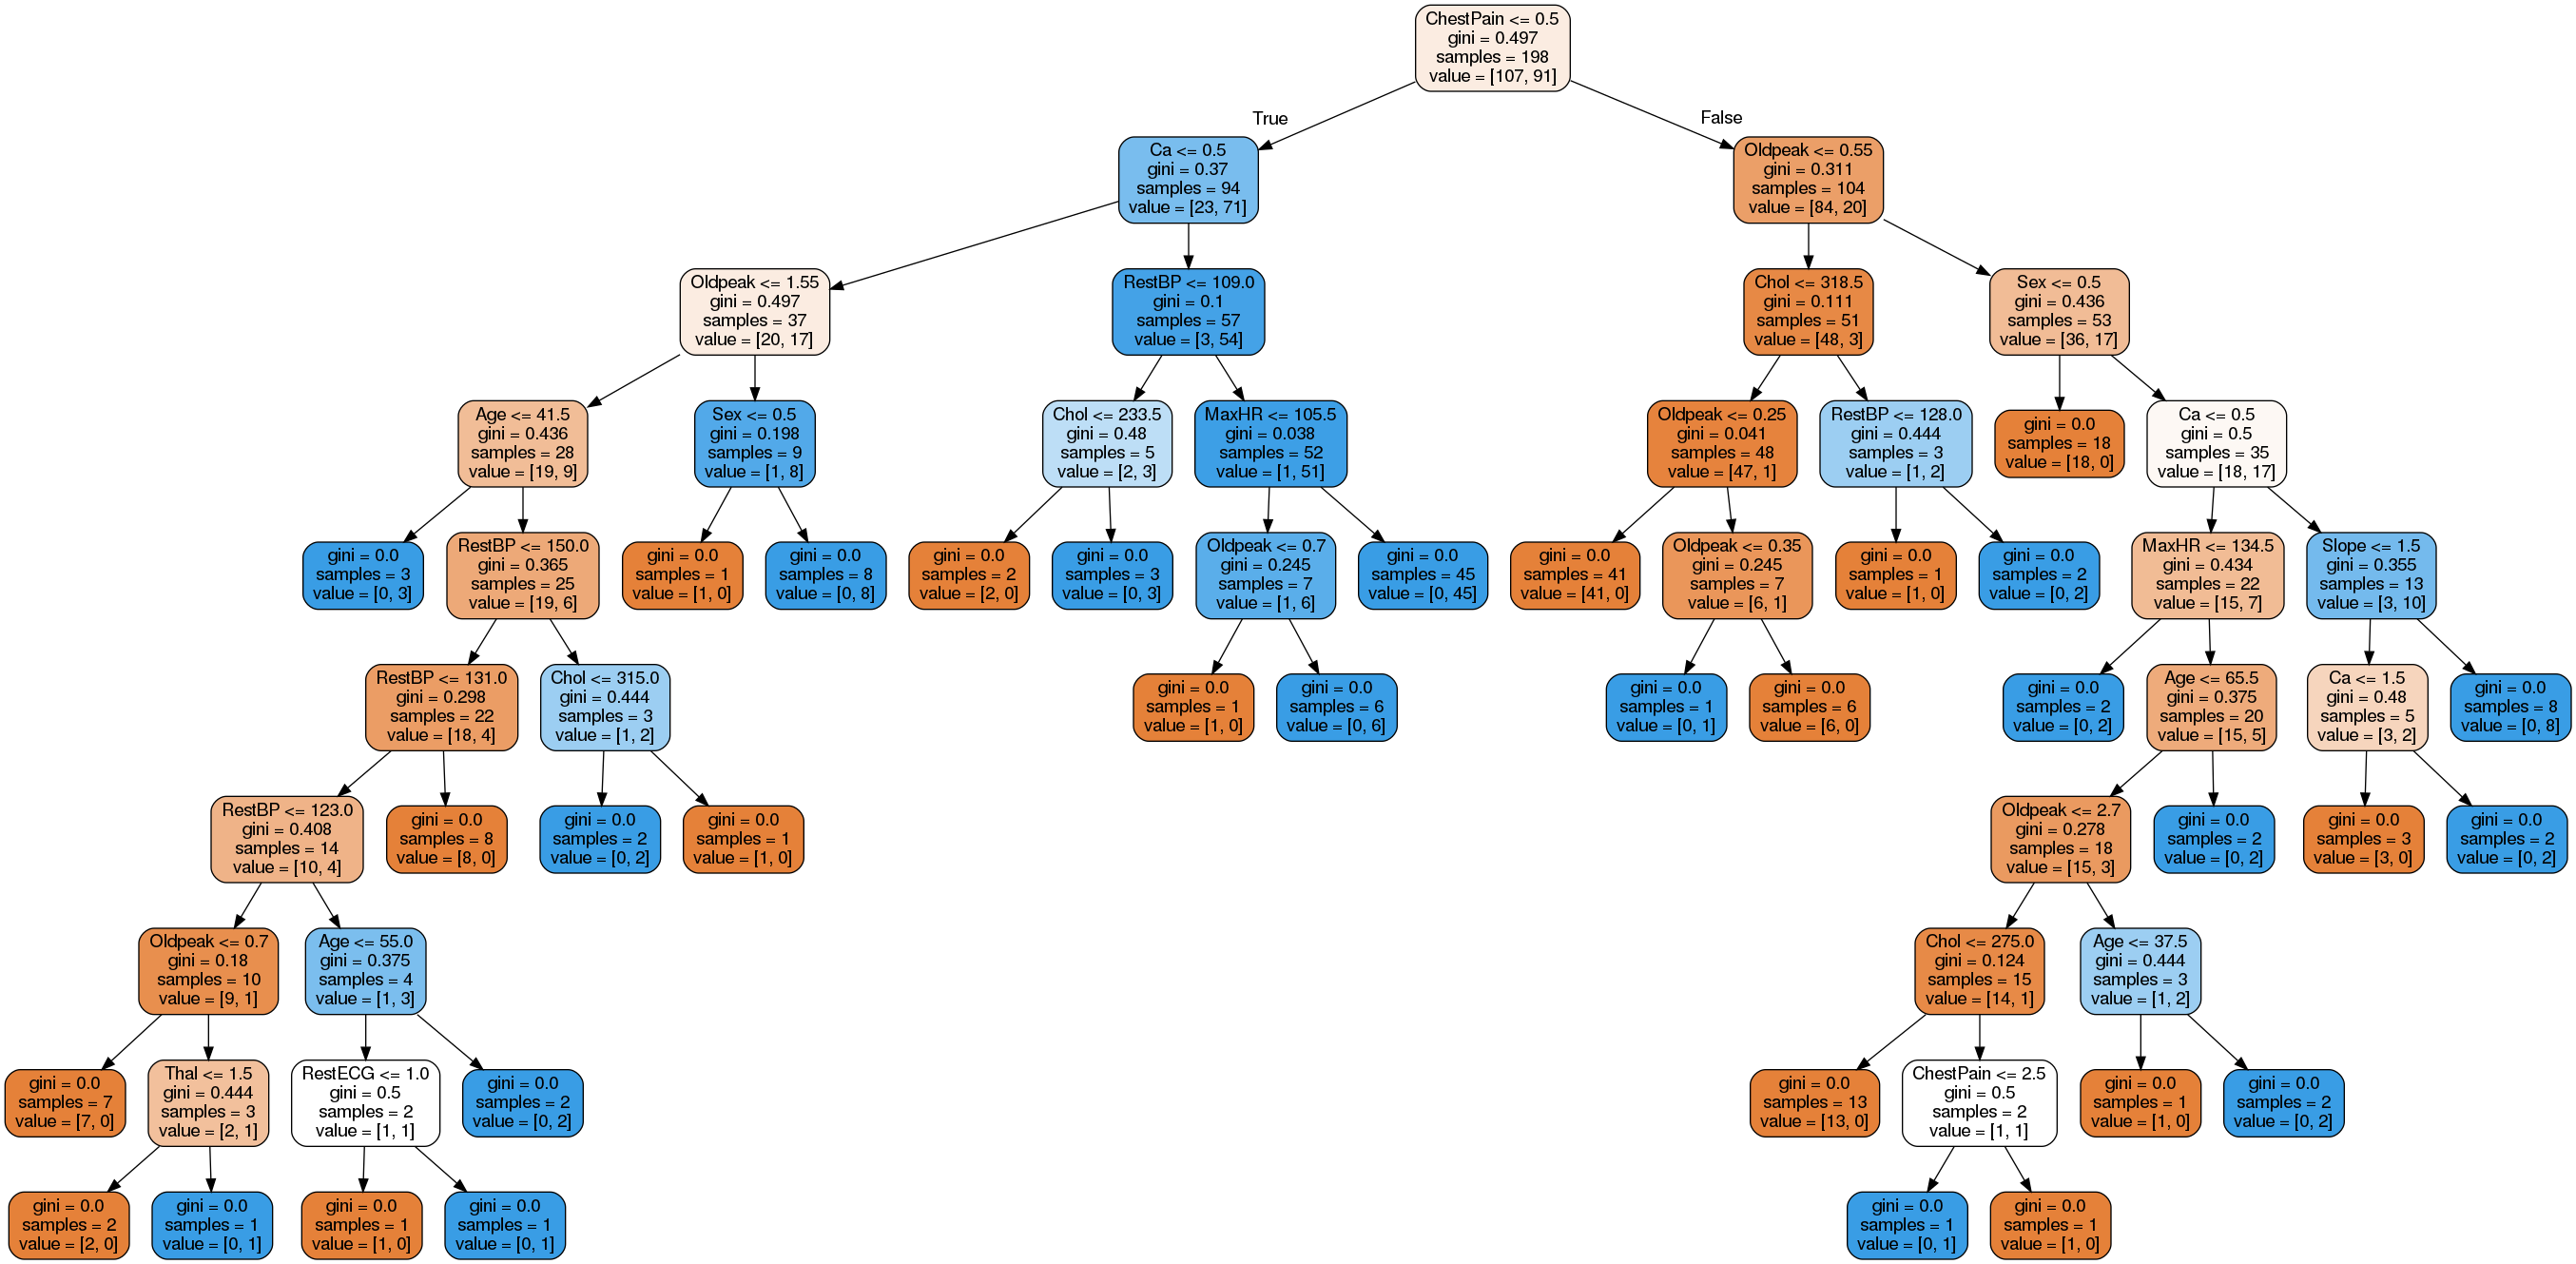

In [30]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())